<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

**Описание данных**

**Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.

**Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
# чтение файла
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('insurance.csv')
    
df.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [22]:
#просмотр общей информации
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [23]:
#проверка пропусков
print ('\033[1m' + '\nПроверка пропусков'+ '\033[0m')
print ('Количество пропусков: {:.0f}'.format(df.isnull().sum().sum()))



Проверка пропусков
Количество пропусков: 0


In [24]:
#проверка на дубликаты
print(df.duplicated().sum())

153


В отчете 153 строчки с дубликатами, строки оставим, так как остсутствует данные с Id, и возможно это разные люди, но с одинаковыми параметрами

In [25]:
#описание данных
display(df.describe().round(2).T)

,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.50,0.50,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.95,8.44,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.36,9900.08,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.19,1.09,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.15,0.46,0.0,0.0,0.0,0.0,5.0


 - Возраст клиентов от 18 до 65 лет
 - Доход от 5300 до 79000
 - Страховых выплат от 0 до 5

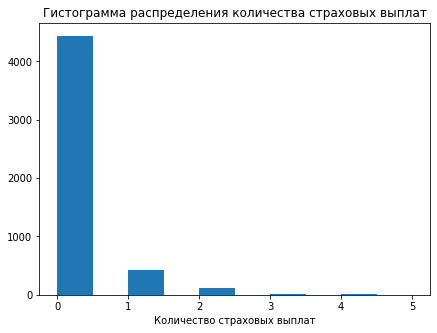

In [26]:
#гистограмма распределения страховых выплат
plt.figure(figsize=[7,5])

plt.hist(df['Страховые выплаты'])

plt.xlabel('Количество страховых выплат')
plt.title('Гистограмма распределения количества страховых выплат')

plt.show()

In [27]:
# количество страховых выплат
df['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

In [28]:
# количество страховых выплат ( в относительных значениях,%)
df['Страховые выплаты'].value_counts(normalize=1)

0    0.8872
1    0.0846
2    0.0230
3    0.0036
4    0.0014
5    0.0002
Name: Страховые выплаты, dtype: float64

In [29]:
df.corr().round(4)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.0000,0.0021,0.0149,-0.0090,0.0101
Возраст,0.0021,1.0000,-0.0191,-0.0067,0.6510
Зарплата,0.0149,-0.0191,1.0000,-0.0303,-0.0150
Члены семьи,-0.0090,-0.0067,-0.0303,1.0000,-0.0363
Страховые выплаты,0.0101,0.6510,-0.0150,-0.0363,1.0000


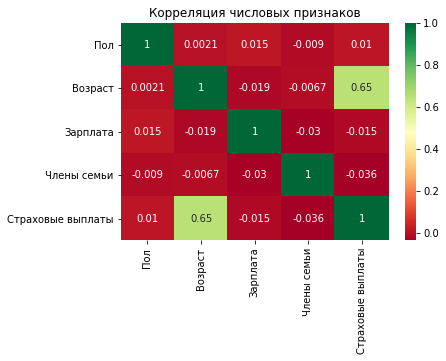

In [30]:
#Корреляция числовых признаков
sns.heatmap(df[[ 'Пол','Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']].corr(), cmap='RdYlGn', annot=True)
plt.title('Корреляция числовых признаков')
plt.show()

Мультиколлинеарности не налюдается, самое большое влияние оказывает возраст клиента на количество страховых выплат.

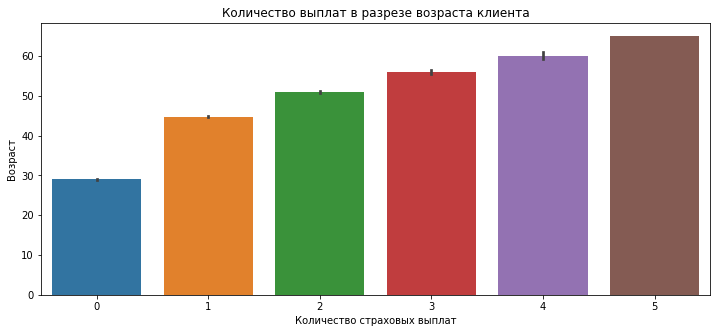

In [33]:
# график распределения страховых выплат
plt.figure(figsize = (12,5))
sns.barplot( x= df['Страховые выплаты'], y= df['Возраст'], data=df)
plt.title('Количество выплат в разрезе возраста клиента')
plt.xlabel('Количество страховых выплат')
plt.ylabel('Возраст')
plt.show()

**Вывод:**
Загружены и исследованы данные:
   - данные содержат 5000 строк
   - пропуски отсутствуют
   - 153 строки с дубликатами
   - 88% процентов клиентов не обращались за страховой выплатой
   - мультиколлинеарности не налюдается, самое большое влияние оказывает возраст клиента на количество страховых выплат.
   -  в возрасте от от 18 до 30 - нет страховых выплат, от 40 до 50 - 1 страховая выплатаБ от 50 лет - от 2 выплат

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

**Вопрос:**  Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)
 
 a. Изменится. Приведите примеры матриц.
 
 b. Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** При умножении матрицы признаков на произвольную обратимую матрицу, предсказания *а* не изменятся

**Обоснование:** 

Предсказания расчитываются по формуле $a = Xw$,
где *X* - матрица признаков, *w* - вектор весов линейной регрессии 

Пусть *P* - произвольная обратимая матрица, на которую умножаются признаки. 

Тогда предсказания рассчитываются по формуле $a_1 = XPw_1$

Докажем, что $a_1 = a$

Подставим в формулу обучения произведение *XP* вместо *Х*  и обозначим новую переменную $w_1$

$$ w = (X^T X)^{-1} X^T \cdot y$$

$$ w_1 = ((XP)^T XP)^{-1} (XP)^T  \cdot y$$

Теперь подставим $w_1$ в формулу предсказаний и вычислим $a_1$:

$$a_1 = XPw_1 = XP \cdot((XP)^T XP)^{-1} (XP)^T \cdot y $$

Перобразуем формулу, используя свойство транспонирования матриц: $(A*B)^T = B^T * A^T$

$$a_1  = XP \cdot(P^T X^T XP)^{-1} (P^T X^T)\cdot  y$$

Преобразуем далее по свойству обратных матриц: $(AB)^-1 = A^{-1} B^{-1}$

$$a_1  = XP \cdot((P^T)^{-1} (X^T X)^{-1} (P)^{-1})\cdot (P^T X^T)\cdot  y$$

 так как по условию задачи матрица признаков умножается на обратимую матрицу, следовательно матрица $P$ квадратная, значит $((P^T)^{-1} (X^T X)^{-1} P^{-1})$ можем заменить на $(P^{-1} (X^T X)^{-1}(P^T)^{-1})$, получаем: 
 
$$a_1  = XP \cdot P^{-1} (X^T X)^{-1} (P^T)^{-1} \cdot(P^T X^T) \cdot y$$ 

Для невырожденной квадратной матрицы $A (\det A\ne 0)$ существует обратная матрица $A^{-1}$ , такая что $A\cdot A^{-1}=A^{-1}\cdot A=E$ , где $E$ -  единичная матрица. 

Единичная матрица E коммутативна с любой другой, то есть $E \cdot A =A \cdot E = A$ и играет роль единицы при умножении. 

$$a_1  = X\cdot E \cdot (X^T X)^{-1}  E  \cdot X^T \cdot y  = X(X^T X)^{-1} X^T \cdot y = a$$


Доказали, что при умножении матрицы признаков на произвольную обратимую матрицу предсказания модели не изменятся, $a_1 = a$

Подставим в формулу обучения произведение *XP* вместо *Х*  и обозначим новую переменную $w_1$

$$ w = (X^T X)^{-1} X^T \cdot y$$

$$ w_1 = ((XP)^T XP)^{-1} (XP)^T  \cdot y$$
Теперь подставим $w_1$ в формулу предсказаний и вычислим $a_1$:

$$a_1 = XPw_1 = XP \cdot((XP)^T XP)^{-1} (XP)^T \cdot y $$

Раскроем скобки $(XP)^T$,  используя свойство транспонирования матриц: $(A*B)^T = B^T * A^T$
получится $(XP)^T = P^T X^T$.
Общая формула будет иметь следующий вид:
$$a_1  = XP \cdot(P^T X^T X P)^{-1} \cdot P^T X^T\cdot  y$$


Далее раскроем $(P^T X^TX P)^{-1}$ это можно сделать если воспользоваться свойством: $(ABC)^{-1} = C^{-1} B^{-1} A^{-1}$ где $A = P^T$, $B = X^T X$, $C = P$ В итоге получаем: $(P^T X^TX P)^{-1} = P^{-1} (X^TX)^{-1} (P^T)^{-1}$

Общая формула принимает следующий вид:
$$a_1  = XP \cdot P^{-1} (X^TX)^{-1} (P^T)^{-1} \cdot P^T X^T\cdot  y$$

Для невырожденной квадратной матрицы $A (\det A\ne 0)$ существует обратная матрица $A^{-1}$ , такая что $A\cdot A^{-1}=A^{-1}\cdot A=E$ , где $E$ -  единичная матрица.

Т.е заменим $P \cdot P^{-1} = E$  и $(P^T)^{-1} \cdot P^T = E$

Общая формула принимает следующий вид:
$$a_1  = X\cdot E \cdot (X^T X)^{-1}  E  \cdot X^T \cdot y $$

Единичная матрица E коммутативна с любой другой, то есть $E \cdot A =A \cdot E = A$ и играет роль единицы при умножении, получим: 

$$a_1  = X\cdot E \cdot (X^T X)^{-1}  E  \cdot X^T \cdot y  = X(X^T X)^{-1} X^T \cdot y = a$$

Доказали, что при умножении матрицы признаков на произвольную обратимую матрицу предсказания модели не изменятся, $a_1 = a$

## Алгоритм преобразования

**Алгоритм**
1. Разделение данных на features и target(признаки и целевой признак)
2. Создание произвольной обратимой матрицы 
3. Обучение модели и расчет метрики R2 на данных без преобразований
4. Расчет произведения призноков на произвольную обратимую матрицу
5. Обучение модели и расчет метрики R2  на новых данных
6. Сравнение значений метрик

**Обоснование:**

Согласно расчету, при умножнии матрицы признаков на произвольную обратимую матрицу, предсказания модели не изменятся. Но при этом мы сможем зашифровать персональные данные клиентов, без потери качество модели.

## Проверка алгоритма

In [34]:
# деление данных на признаки и целевой признак 
features = df.drop(['Страховые выплаты'], axis=1)
target = df['Страховые выплаты']

#проверка
print(features.shape)
print(target.shape)
print(features.head(2))
print(target.head(2))

(5000, 4)
(5000,)
   Пол  Возраст  Зарплата  Члены семьи
0    1     41.0   49600.0            1
1    0     46.0   38000.0            1
0    0
1    1
Name: Страховые выплаты, dtype: int64


In [35]:
#функия для создания произвольной матрицы и проверки на обратимость
def create_matrix():
    matrix = np.random.normal(size=(4, 4))
    print('Случайная матрица:', matrix)
    try:
          inverse_matrix = np.linalg.inv(matrix)
          print('обратная матрица:', inverse_matrix)
    except: 
          print ('Создана необратимая матрица, необходимо создать новую')
    return matrix

In [16]:
#создание матрицы
matrix = create_matrix()

Случайная матрица: [[-0.64281326  1.59441632  0.33679843 -1.00094205]
 [ 1.48437727 -1.49560021 -0.8313032  -0.50873383]
 [-0.04548692 -0.69453549  0.84348635 -0.59248973]
 [-0.96200173  0.62451503 -1.19780589  0.04695286]]
обратная матрица: [[ 2.42407049e-01  3.19819150e-01 -7.37469759e-01 -6.73122456e-01]
 [ 4.10834907e-01 -5.23140155e-02 -6.74762139e-01 -3.23337273e-01]
 [-9.67650169e-05 -2.99400735e-01  2.19811380e-01 -4.72306832e-01]
 [-5.00341830e-01 -3.89465115e-01 -5.27267578e-01 -2.41686701e-01]]


In [36]:
#oбучение модели и расчет метрики R2 на данных без преобразований
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print( 'R2 модели без преобразований:', r2_score(target, predictions))

R2 модели без преобразований: 0.4249455028666801


In [37]:
# умножение признаков на произвольную матрицу
features_new =  np.dot(features, matrix)
print(features_new)

[[ -2196.89640626 -34508.0610699   41801.9784037  -29409.302483  ]
 [ -1661.18347498 -26460.52178252  32013.0434568  -22537.96438923]
 [  -912.17830604 -14628.6177336   17689.10550741 -12457.03752593]
 ...
 [ -1514.24292806 -23573.41614573  28575.1655088  -20095.48248032]
 [ -1458.29468868 -22740.74582466  27560.4582778  -19386.46626605]
 [ -1806.81106211 -28237.79884109  34221.40821664 -24070.2814097 ]]


In [38]:
# Обучение модели и расчет метрики R2 на новых данных
model = LinearRegression()
model.fit(features_new, target)
predictions_new = model.predict(features_new)
print( 'R2 преобразованной модели:', r2_score(target, predictions_new))

R2 преобразованной модели: 0.42494550286667965


**Вывод:**
    Проверка пройдена успешно. Показатель метрики R2 модели на исходных и преобразованных данных не отличаются. Защита персональных данных клиентов страховой компании выполнена.